In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("case1.xlsx")
df.shape

(40, 5)

In [2]:
df

,Bulan,A,B,c,D
0,2019-03-01,2222.0,4326.0,3346.0,2187
1,2019-04-01,2328.0,4288.0,3233.0,2213
2,2019-05-01,2288.0,4312.0,NaN,3096
3,2019-06-01,2275.0,4442.0,2936.0,3841
4,2019-07-01,2322.0,4438.0,3322.0,3745
5,2019-08-01,2171.0,4542.0,2782.0,3849
6,2019-09-01,8743.0,9793.0,6124.0,13706
7,2019-10-01,9216.0,10203.0,4898.0,16413
8,2019-11-01,9244.0,10255.0,7052.0,18551
9,2019-12-01,8752.0,10841.0,5641.0,18456


In [3]:
df.isna().sum()

Bulan    0
A        2
B        2
c        2
D        0
dtype: int64

In [4]:
df['A'].interpolate(method='linear', inplace=True)
df['B'].interpolate(method='linear', inplace=True)
df['c'].interpolate(method='linear', inplace=True)

In [5]:
df.isna().sum()

Bulan    0
A        0
B        0
c        0
D        0
dtype: int64

In [6]:
df.head()

,Bulan,A,B,c,D
0,2019-03-01,2222.0,4326.0,3346.0,2187
1,2019-04-01,2328.0,4288.0,3233.0,2213
2,2019-05-01,2288.0,4312.0,3084.5,3096
3,2019-06-01,2275.0,4442.0,2936.0,3841
4,2019-07-01,2322.0,4438.0,3322.0,3745


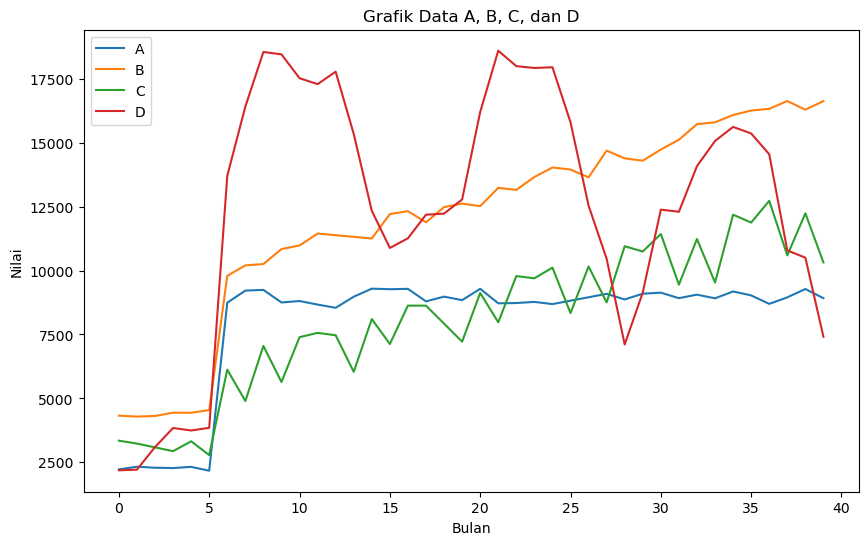

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['A'], label='A')
plt.plot(df.index, df['B'], label='B')
plt.plot(df.index, df['c'], label='C')
plt.plot(df.index, df['D'], label='D')

# Menambahkan label dan judul
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Grafik Data A, B, C, dan D')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()

In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# ARIMA --> Autoregressive Integrated Moving Average
# SARIMA -->Seasonal Autoregressive Integrated Moving Average

# ARIMAX-> ARIMA with Exogenous Variables
#SARIMAX-->SARIMA with Exogenous Variables

In [9]:
#Training -> bulan Februari 2015 - Desember 2021 [83 Data]
train = df.iloc[:-10]
#Testing -> Januari 2022 - Oktober 2022 [10 Data]
test = df.iloc[-10:]

In [10]:
# Grid Search
import itertools # Library untuk iterasi
p = d = q = range(0,3)
pdq = list(itertools.product(p, d, q)) # Membuat semua kombinasi yang berbeda

# Akaike Information Criterion : evaluasi model statistical dari sebuah dataset,
#untuk menentukan model terbaik dari kombinasi parameternya
aic = float("inf")

for parameter in pdq:
  try:
      model = SARIMAX(train["A"],
                      exog = train[["B",
                                    "c",
                                    "D"]],
                      order = parameter,
                      seasonal_order = (0,0,0,0))

      results = model.fit()

      if results.aic < aic:
          aic = results.aic
          best_order = parameter

  except:
      continue

print("Best ARIMAX parameters : order = {}".format(best_order)) # (1, 2, 2)

C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarni

Best ARIMAX parameters : order = (1, 2, 2)


C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
model_arimax = SARIMAX(train['A'], # Misalkan kita mau prediksi kolom A, dengan menggunakan kolom B,c,d sebagai features bisa diganti sesuai kebutuhan
                        exog = train[["B","c","D"]],
                        order = (1,2,2), # --> untuk parameter order dicari yang paling optimal dengan grid search
                        seasonal_order = (0, 0, 0, 0)) # --> akan menjadi format ARIMAX

In [12]:
results_arimax = model_arimax.fit()

C:\Users\DimasRN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
# Define the number of periods (1 year) to forecast into the future
forecast_periods = 12  # Assuming monthly data

In [14]:
start = len(train)
end = len(train) + len(test) - 1

predictions_arimax = results_arimax.predict(start = start,
                                              end = end,
                                              exog = test[["B",
                                                           "c",
                                                           "D"]])

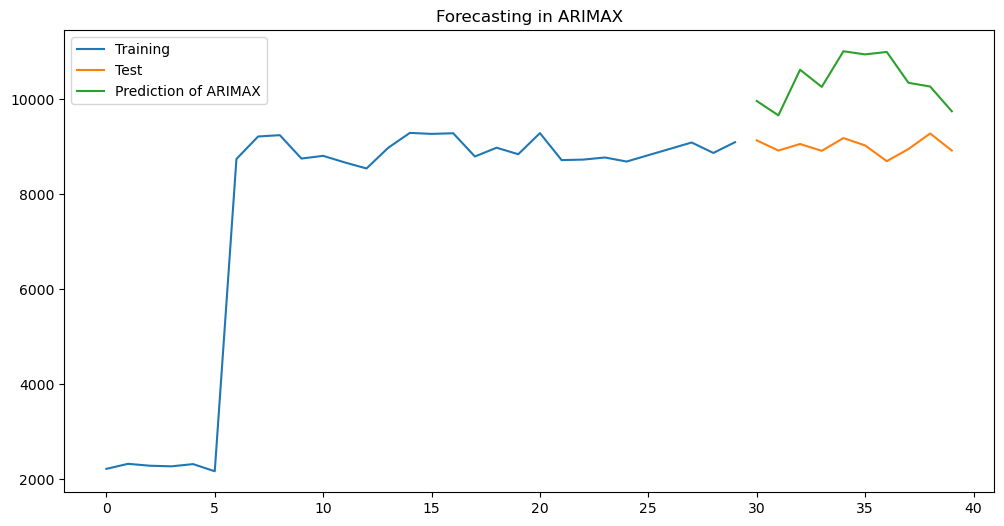

In [15]:
# Plot SARIMAX
plt.figure(figsize=(12, 6))
plt.plot(train["A"], label = "Training")
plt.plot(test["A"], label = "Test")
plt.plot(test.index, predictions_arimax, label = "Prediction of ARIMAX")
plt.legend()
plt.title("Forecasting in ARIMAX")
plt.show()

In [16]:
def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

def calculate_mape(actual, predicted):
    return 100 * np.mean(np.abs((actual - predicted) / actual))

def calculate_mad(data):
    return np.mean(np.abs(data - np.mean(data)))

In [17]:
calculate_mae(test["A"], predictions_arimax)

1372.8195910713698

In [18]:
calculate_mape(test["A"], predictions_arimax)

15.276046154276319

In [19]:
calculate_mad(test["A"])

128.0

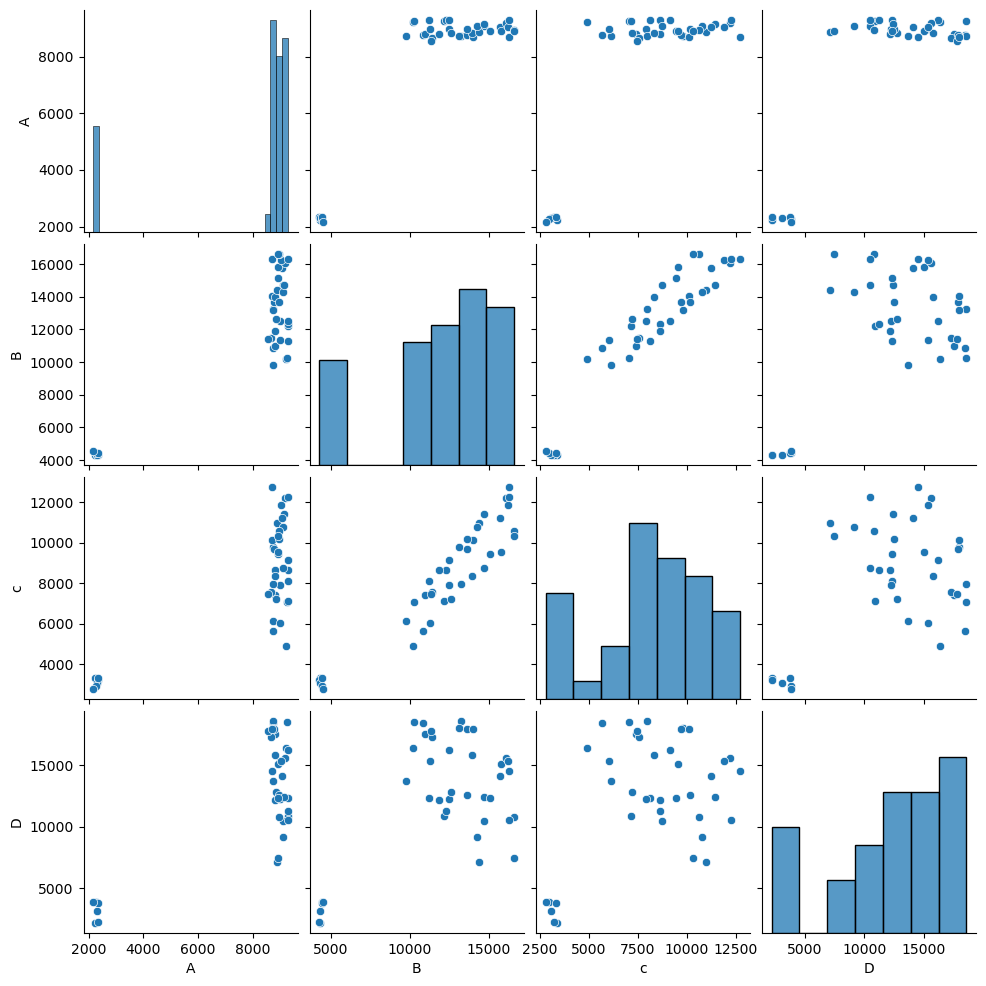

In [20]:
import seaborn as sns
sns.pairplot(df)
plt.show()


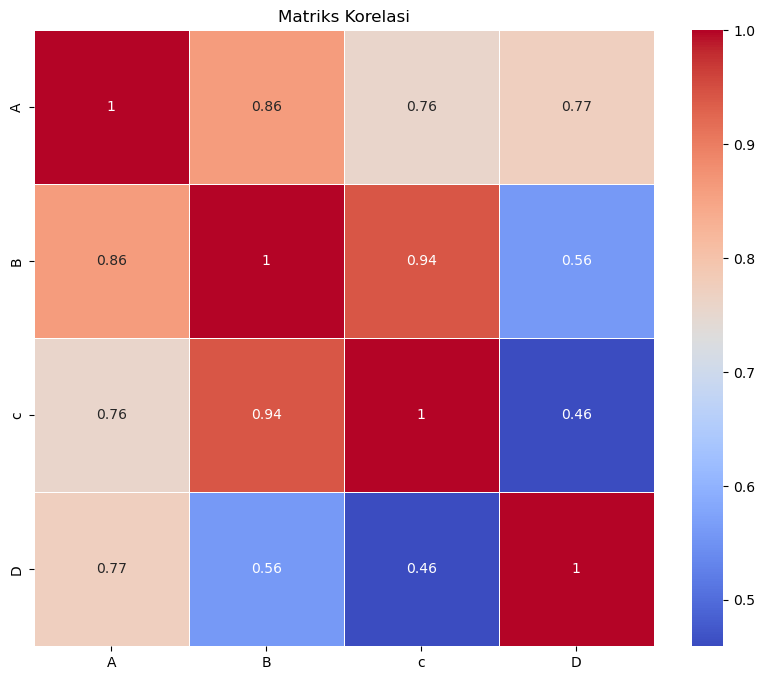

In [21]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

In [22]:
# forecast 12 bulan kedepan dengan anggapan data eksogen dari 12 data terakhir

forecast = results_arimax.get_forecast(steps=12, exog=train[["B",
                                    "c",
                                    "D"]].iloc[-12:])
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

print(mean_forecast)

30    7246.468480
31    7066.390418
32    7580.006566
33    8011.745835
34    8165.564713
35    8447.058922
36    8733.964386
37    7968.759733
38    7707.171266
39    7997.051624
40    7811.454769
41    7732.341657
Name: predicted_mean, dtype: float64


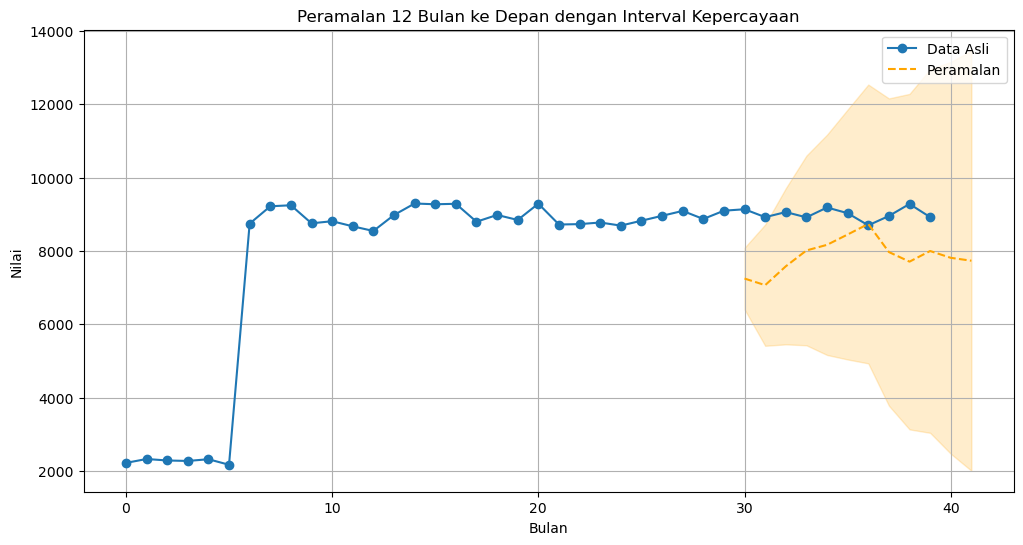

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['A'], label='Data Asli', marker='o')
plt.plot(mean_forecast.index, mean_forecast.values, label='Peramalan', linestyle='--', color='orange')
plt.fill_between(mean_forecast.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='orange', alpha=0.2)
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Peramalan 12 Bulan ke Depan dengan Interval Kepercayaan')
plt.legend()
plt.grid(True)
plt.show()